### 1. Programar eficientemente el cálculo de la pendiente y de la ordenada al origen para el método de cuadrados mínimos a partir de n puntos. No hacer operaciones de más o redundantes.

In [102]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [103]:
def procesamiento_datos():
    df = pd.read_excel('datos.xlsx')
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=0, how='all')
    df.drop(index=3, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename(columns={'Unnamed: 2': 'dia', 'Unnamed: 3': 'acumulado'}, inplace=True)

    x = df["dia"].astype(float).values
    y = df["acumulado"].astype(float).values
    return x, y

def regresion_lineal(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y)

    a = ((n*sum_xy) - (sum_x*sum_y)) / ((n*sum_xx)-(sum_x**2))
    b = (sum_y- (a*sum_x))/n
    return a, b

def recta_prediccion(a, b, x):
    y2 = [a * xi + b for xi in x]
    return y2

def error_regresion(a, b, x, y):
    error = np.sum(((a * x) + b - y) ** 2)
    return error

### 2. Usar los datos del archivo Excel que aparece en la unidad, aplicar lo anterior y calcular, y por último graficar los puntos y la recta obtenida.

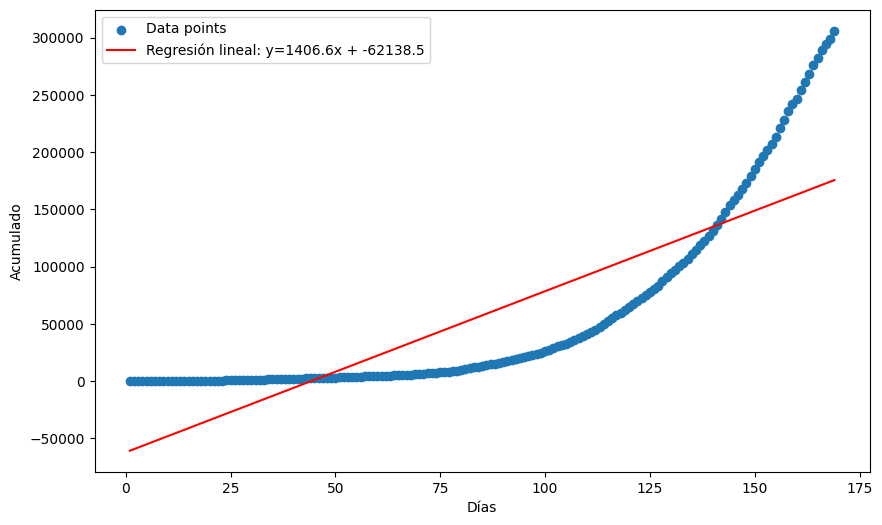

In [104]:
def plot_resultados(x, y, y2, a, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data points')
    plt.plot(x, y2, color='red', label=f'Regresión lineal: y={a.round(1)}x + {b.round(1)}')
    plt.xlabel('Días')
    plt.ylabel('Acumulado')
    plt.legend()
    plt.show()

x, y = procesamiento_datos()
a, b = regresion_lineal(x, y)
y2 = recta_prediccion(a, b, x)
plot_resultados(x, y, y2, a, b)

### 3. Sobre los mismos datos, ajustar una curva de la forma y = b*e^(ax), convirtiéndola previamente en lineal y aplicando luego regresión lineal. Comparar de alguna forma la curva obtenida con la anterior.

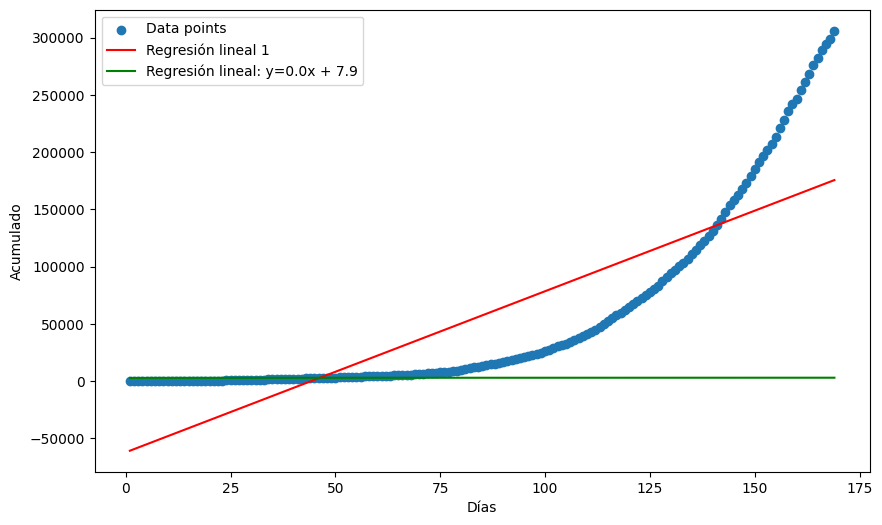

343911179945.8664
1696757267542.4695


In [105]:
def regresion_lineal_log(x, y_log):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y_log)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y_log)

    a = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_xx) - (sum_x*2))
    b = (sum_y - (a * sum_x)) / n
    return a, b

def recta_prediccion_log(a, b, x):
    y2_log = [a * xi + b for xi in np.log(x)]
    return np.exp(y2_log)

def plot_resultados_comparados(x, y, y2, y3, a, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data points')
    plt.plot(x, y2, color='red', label='Regresión lineal 1')
    plt.plot(x, y3, color='green', label=f'Regresión lineal: y={a.round(1)}x + {b.round(1)}')
    plt.xlabel('Días')
    plt.ylabel('Acumulado')
    plt.legend()
    plt.show()

e1 = error_regresion(a, b, x, y)

y_log = np.log(y)
a, b = regresion_lineal_log(x, y_log)
y2_log = recta_prediccion_log(a, b, x)
plot_resultados_comparados(x, y, y2, y2_log, a, b)

e2 = error_regresion(a, b, x, y)

print(e1)
print(e2)
